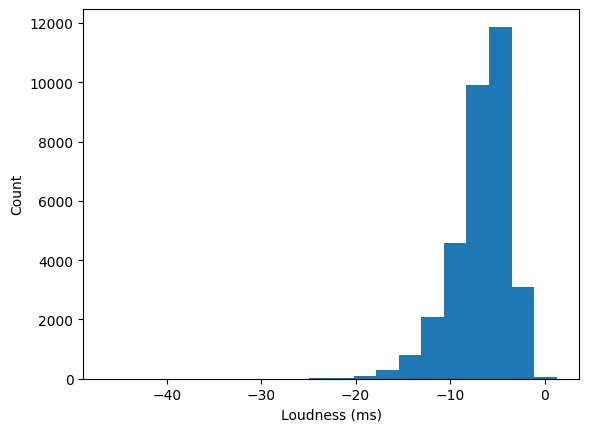

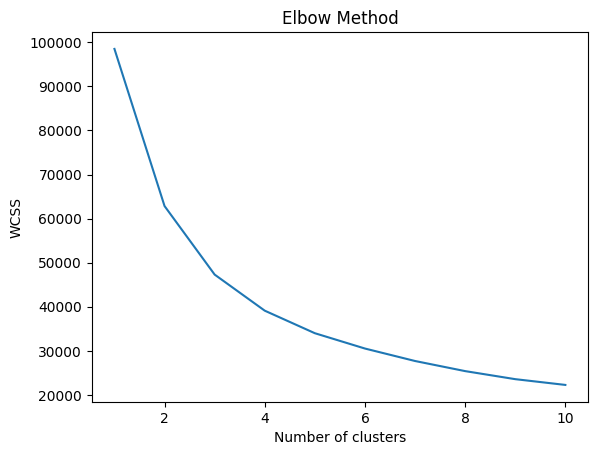

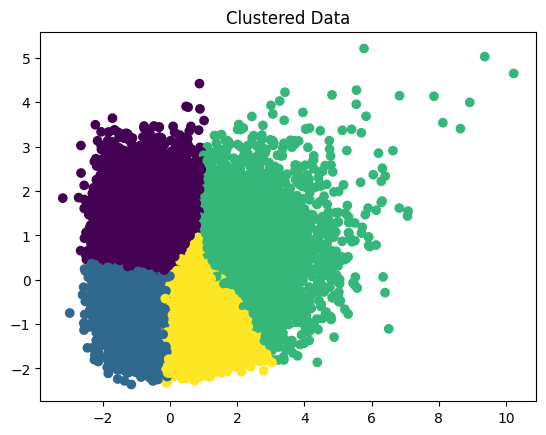

Model Accuracy: 0.3852596314907873


In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("/content/sample_data/spotify dataset.csv")
data

import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data['loudness'], bins=20)
plt.xlabel('Loudness (ms)')
plt.ylabel('Count')
plt.show()

X = data[['danceability','energy','loudness']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clustered Data')
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, data['playlist_genre'], test_size=0.2)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')


user_input = pd.DataFrame({'danceability': [0.748], 'energy': [0.916], 'loudness': [6]})
recommended_genre = model.predict(user_input)
recommended_songs = data[data['playlist_genre'] == recommended_genre[0]]